# Linear Regression 

### Linear regression is a fundamental statistical technique used for modeling and analyzing the relationship between a dependent variable (often referred to as the target or outcome) and one or more independent variables (predictors or features). It assumes a linear relationship, meaning that changes in the predictor variables are associated with proportional changes in the dependent variable. The goal of linear regression is to find the best-fitting line (the linear equation) that minimizes the difference between the predicted values and the actual data points, typically done by minimizing the sum of squared differences (residuals). This line can be used to make predictions or understand the strength and direction of the relationships between variables.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Technology Companies
symbols = ['AMD','NVDA'] 
market = ['^GSPC']
start = '2018-01-01'
end = '2023-08-01'

In [3]:
df = yf.download(symbols, start, end)
benchmark = yf.download(market, start, end)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Resample the data to monthly frequency
df_monthly = df['Adj Close'].resample('M').ffill()
benchmark_monthly = benchmark['Adj Close'].resample('M').ffill()


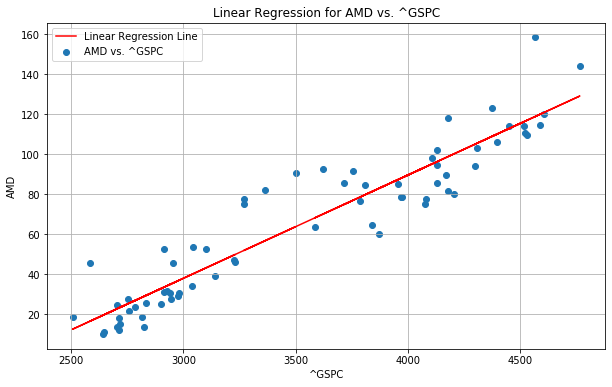

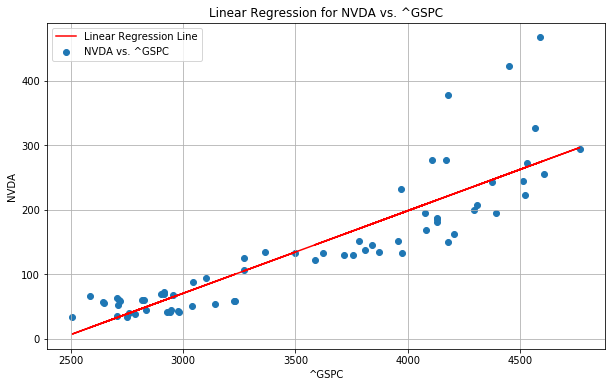

  Symbol        MAE          MSE       RMSE  R-squared  Adjusted R-squared
0    AMD  10.261576   170.497061  13.057452   0.876901            0.873054
1   NVDA  33.009675  2302.528439  47.984669   0.764164            0.756795


In [5]:
# Function to perform linear regression and calculate metrics
def perform_linear_regression(symbol_data, benchmark_data, symbol_name):
    slope, intercept, r_value, p_value, std_err = stats.linregress(benchmark_data, symbol_data)
    regression_line = intercept + slope * benchmark_data

    # Plot the linear regression
    plt.figure(figsize=(10, 6))
    plt.scatter(benchmark_data, symbol_data, label=f'{symbol_name} vs. {market[0]}')
    plt.plot(benchmark_data, regression_line, color='red', label='Linear Regression Line')
    plt.title(f'Linear Regression for {symbol_name} vs. {market[0]}')
    plt.xlabel(f'{market[0]}')
    plt.ylabel(symbol_name)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate metrics
    residuals = symbol_data - regression_line
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    r_squared = r_value ** 2

    # Calculate adjusted R-squared
    n = len(benchmark_data)
    k = 2  # Number of predictors (including the intercept)
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

    return {
        'Symbol': symbol_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r_squared,
        'Adjusted R-squared': adj_r_squared
    }

# Initialize a list to store the results
results = []

# Perform linear regression and calculate metrics for each symbol
for symbol in symbols:
    result = perform_linear_regression(df_monthly[symbol], benchmark_monthly, symbol)
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

In [6]:

# Calculation prediction for each symbol and print DataFrame of actual and prediction
for symbol in symbols:
    slope, intercept, _, _, _ = stats.linregress(benchmark_monthly, df_monthly[symbol])
    predictions = intercept + slope * benchmark_monthly
    prediction_df = pd.DataFrame({'Actual': df_monthly[symbol], 'Prediction': predictions})
    prediction_df['Difference'] = prediction_df['Actual'] - prediction_df['Prediction']
    print(f'Predictions for {symbol}:\n', prediction_df)



Predictions for AMD:
                 Actual  Prediction  Difference
Date                                          
2018-01-31   13.740000   28.782381  -15.042381
2018-02-28   12.110000   23.103001  -10.993001
2018-03-31   10.050000   19.335339   -9.285339
2018-04-30   10.880000   19.706112   -8.826112
2018-05-31   13.730000   22.660958   -8.930959
...                ...         ...         ...
2023-03-31   98.010002   95.165764    2.844238
2023-04-30   89.370003   98.272946   -8.902943
2023-05-31  118.209999   98.807427   19.402573
2023-06-30  113.910004  112.778653    1.131351
2023-07-31  114.400002  119.934946   -5.534944

[67 rows x 3 columns]
Predictions for NVDA:
                 Actual  Prediction  Difference
Date                                          
2018-01-31   60.808376   47.909657   12.898720
2018-02-28   59.905487   33.833430   26.072057
2018-03-31   57.328564   24.495358   32.833205
2018-04-30   55.672504   25.414310   30.258194
2018-05-31   62.466568   32.737837   29